# **1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import re
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline

# **2. Import Dataset**

In [ ]:
df = pd.read_csv('email_classification2.csv')

In [ ]:
df.label.value_counts()

0    1896
1    1896
Name: label, dtype: int64

In [ ]:
df['text'] = df['text'].values.astype('U')
df['label'] = df['label'].astype('int').values

# **3. Split the dataset into training and testing sets**

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.1, random_state=42)

In [ ]:
train_labels.value_counts()

1    1714
0    1698
Name: label, dtype: int64

In [ ]:
test_labels.value_counts()

0    198
1    182
Name: label, dtype: int64

# **4. Feature Extraction**

In [ ]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(train_data)
X_test_bow = vectorizer.transform(test_data)

# **5. Implementation of spam email detection**

In [ ]:
# Naive Bayes
nb_classifier = MultinomialNB(alpha=17)
nb_classifier.fit(X_train_bow, train_labels)
nb_predictions = nb_classifier.predict(X_test_bow)
accuracy = accuracy_score(test_labels, nb_predictions)
accuracy

0.968421052631579

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_bow, train_labels)
dt_predictions = dt_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, dt_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9789473684210527


In [ ]:
# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_bow, train_labels)
svm_predictions = svm_classifier.predict(X_test_bow)

# Calculate accuracy
accuracy = accuracy_score(test_labels, svm_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# **6. Evaluation**

In [ ]:
# Evaluate Naive Bayes
nb_f1 = f1_score(test_labels, nb_predictions, average='weighted')
nb_recall = recall_score(test_labels, nb_predictions, average='weighted')
nb_precision = precision_score(test_labels, nb_predictions, average='weighted')

In [ ]:
# Evaluate Decision Tree
dt_f1 = f1_score(test_labels, dt_predictions, average='weighted')
dt_recall = recall_score(test_labels, dt_predictions, average='weighted')
dt_precision = precision_score(test_labels, dt_predictions, average='weighted')

In [ ]:
# Evaluate SVM
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')

In [ ]:
# Print or store the evaluation metrics
print("Naive Bayes Metrics:")
print("F1-Score:", nb_f1)
print("Recall:", nb_recall)
print("Precision:", nb_precision)

# Print or store the evaluation metrics
print("\nDecision Tree Metrics:")
print("F1-Score:", dt_f1)
print("Recall:", dt_recall)
print("Precision:", dt_precision)

# Print or store the evaluation metrics
print("\nSupport Vector Machine (SVM) Metrics:")
print("F1-Score:", svm_f1)
print("Recall:", svm_recall)
print("Precision:", svm_precision)

Naive Bayes Metrics:
F1-Score: 0.968347171404447
Recall: 0.968421052631579
Precision: 0.9702255639097745

Decision Tree Metrics:
F1-Score: 0.9789543735114183
Recall: 0.9789473684210527
Precision: 0.9791784082754275

Support Vector Machine (SVM) Metrics:
F1-Score: 1.0
Recall: 1.0
Precision: 1.0


# **7. Applying 10 fold cross validation**

In [ ]:
#nb_classifier
pipeline = make_pipeline(vectorizer, nb_classifier)

cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=10, scoring='accuracy')

print("NB Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

NB Cross-Validation Scores: [0.96315789 0.97105263 0.96306069 0.97361478 0.96833773 0.9762533
 0.94986807 0.9525066  0.96042216 0.96833773]
Mean Accuracy: 0.9646611581724759


In [ ]:
#dt_classifier
pipeline = make_pipeline(vectorizer, dt_classifier)

cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=10, scoring='accuracy')

print("DT Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

DT Cross-Validation Scores: [0.97631579 0.97105263 0.97097625 0.98680739 0.98680739 0.98416887
 0.96833773 0.9762533  0.97889182 0.97097625]
Mean Accuracy: 0.977058741841411


In [ ]:
#svm_classifier
pipeline = make_pipeline(vectorizer, svm_classifier)

cv_scores = cross_val_score(pipeline, df['text'], df['label'], cv=10, scoring='accuracy')

print("SVM Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

SVM Cross-Validation Scores: [0.99210526 0.99473684 0.99736148 1.         0.98944591 0.99736148
 0.99472296 0.99736148 0.98680739 0.99208443]
Mean Accuracy: 0.9941987223996668


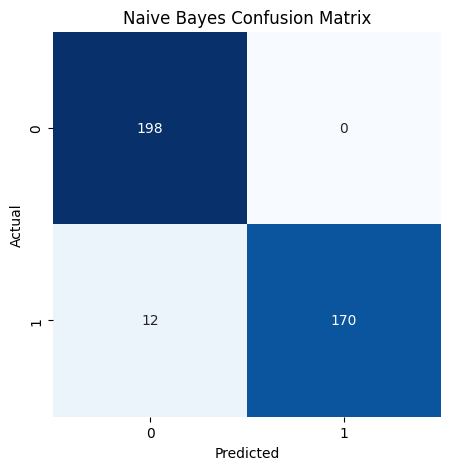

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(test_labels, nb_predictions, 'Naive Bayes Confusion Matrix')

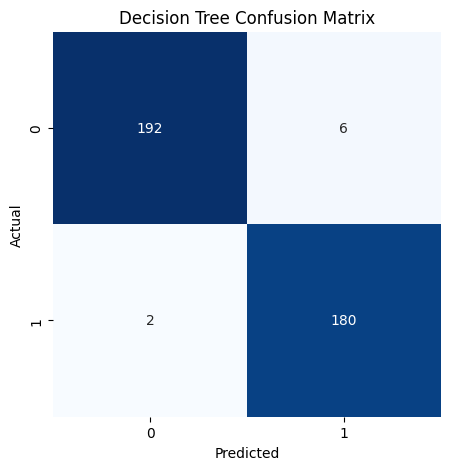

In [ ]:
plot_confusion_matrix(test_labels, dt_predictions, 'Decision Tree Confusion Matrix')

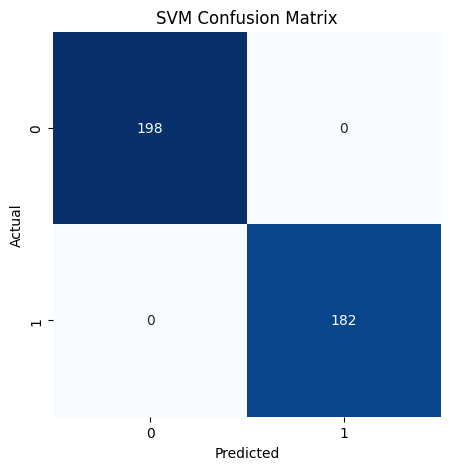

In [ ]:
plot_confusion_matrix(test_labels, svm_predictions, 'SVM Confusion Matrix')

# **8. Input/Output System**

In [ ]:
def classify_email(input_text):
    input_text = [input_text]
    input_bow = vectorizer.transform(input_text)
    prediction = svm_classifier.predict(input_bow)
    return prediction[0]

user_input = input("Enter an email text: ")
result = classify_email(user_input)

if result == 1:
    print("This email is classified as spam.")
else:
    print("This email is not spam.")

Enter an email text: Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.
This email is classified as spam.
